In [126]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro, kstest, kruskal
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
os.environ['OMP_NUM_THREADS'] = "1"
import pandas as pd

In [127]:
df = pd.read_csv("causesOfDeath.csv")
df.head(30)

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
0,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007
1,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,15925.0,Afghanistan,AFG,2007
2,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",481.0,Afghanistan,AFG,2007
3,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,393.0,Afghanistan,AFG,2007
4,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,2127.0,Afghanistan,AFG,2007
5,Interpersonal violence,Deaths - Interpersonal violence - Sex: Both - ...,3657.0,Afghanistan,AFG,2007
6,HIV/AIDS,Deaths - HIV/AIDS - Sex: Both - Age: All Ages ...,148.0,Afghanistan,AFG,2007
7,Drug use disorders,Deaths - Drug use disorders - Sex: Both - Age:...,252.0,Afghanistan,AFG,2007
8,Tuberculosis,Deaths - Tuberculosis - Sex: Both - Age: All A...,4995.0,Afghanistan,AFG,2007
9,Road injuries,Deaths - Road injuries - Sex: Both - Age: All ...,7425.0,Afghanistan,AFG,2007


In [128]:
df.info()

df.isnull().sum()

df_filter = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201762 entries, 0 to 201761
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Causes name              201762 non-null  object 
 1   Causes Full Description  201762 non-null  object 
 2   Death Numbers            190575 non-null  float64
 3   Entity                   201762 non-null  object 
 4   Code                     200277 non-null  object 
 5   Year                     201762 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 9.2+ MB


In [129]:
def test_ks(dataset, dist='norm'):
    result_list = ""
    for category in dataset["Causes name"].unique():
        nlist = dataset[dataset["Causes name"] == f"{category}"]["Death Numbers"] 
        sval, pval = kstest(nlist, dist)
        zero_hypothesis = True
        if pval < 0.05:
            zero_hypothesis = False
        result_list += f"{category} sval: {sval:.2f} pval: {pval:.2f} == {zero_hypothesis}\n" 
    return result_list
print(test_ks(df_filter))

Meningitis sval: 0.88 pval: 0.00 == False
Neoplasms sval: 0.99 pval: 0.00 == False
Fire, heat, and hot substances sval: 0.90 pval: 0.00 == False
Malaria sval: 0.50 pval: 0.00 == False
Drowning sval: 0.95 pval: 0.00 == False
Interpersonal violence sval: 0.94 pval: 0.00 == False
HIV/AIDS sval: 0.89 pval: 0.00 == False
Drug use disorders sval: 0.80 pval: 0.00 == False
Tuberculosis sval: 0.90 pval: 0.00 == False
Road injuries sval: 0.98 pval: 0.00 == False
Maternal disorders sval: 0.83 pval: 0.00 == False
Lower respiratory infections sval: 0.99 pval: 0.00 == False
Neonatal disorders sval: 0.96 pval: 0.00 == False
Alcohol use disorders sval: 0.88 pval: 0.00 == False
Exposure to forces of nature sval: 0.50 pval: 0.00 == False
Diarrheal diseases sval: 0.91 pval: 0.00 == False
Environmental heat and cold exposure sval: 0.76 pval: 0.00 == False
Nutritional deficiencies sval: 0.88 pval: 0.00 == False
Self-harm sval: 0.97 pval: 0.00 == False
Conflict and terrorism sval: 0.50 pval: 0.00 == False
D

In [130]:
def test_kruskal(dataset):
    data = []
    for category in dataset["Causes name"].unique():
        nlist = dataset[dataset["Causes name"] == f"{category}"]["Death Numbers"]
        data.append(nlist)
    sval, pval = kruskal(*data)
    zero_hypothesis = True
    if pval < 0.05:
        zero_hypothesis = False
    data_result = f"Kruskal sval: {sval:.2f} pval: {pval:.2f} == {zero_hypothesis}\n" 
    return data_result
print(test_kruskal(df_filter))

Kruskal sval: 62667.28 pval: 0.00 == False



In [131]:
df_filter.isnull().sum()

Causes name                0
Causes Full Description    0
Death Numbers              0
Entity                     0
Code                       0
Year                       0
dtype: int64

In [132]:
from sklearn.preprocessing import StandardScaler

X = df_filter[['Year', 'Death Numbers']]

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

print(X_Scaled[:5])

[[ 0.28989327 -0.07000396]
 [ 0.28989327  0.12028574]
 [ 0.28989327 -0.10591762]
 [ 0.28989327 -0.10720653]
 [ 0.28989327 -0.08180918]]


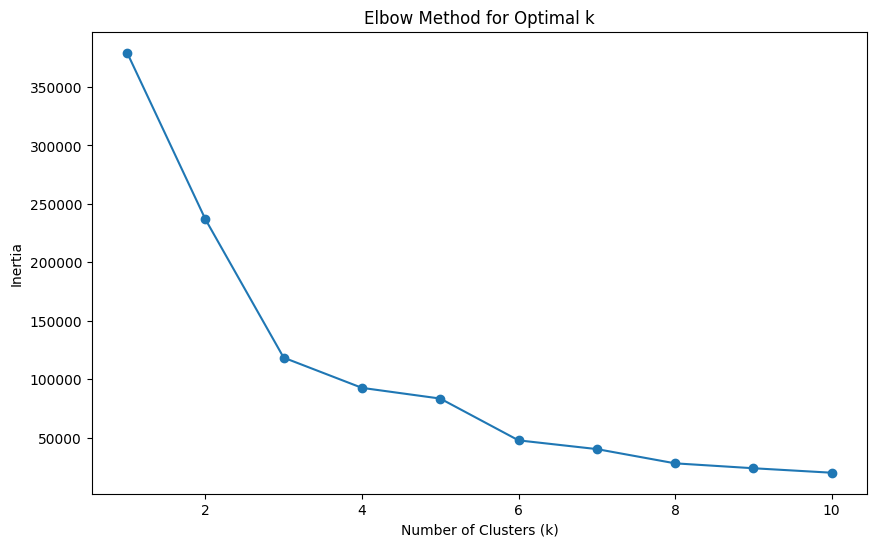

In [133]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
# Lista för att spara WCSS-värden 
WCSS = []
# Testa K-means för k från 1 till 10 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42) 
    kmeans.fit(X_Scaled) 
    WCSS.append(kmeans.inertia_)
# Plotta WCSS för varje k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [134]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)

df_filter['Cluster'] = kmeans.fit_predict(X_Scaled)

df_filter['Cluster'].unique()

df_filter.head(15)

C:\Users\eldaq\AppData\Local\Temp\ipykernel_20324\1978950520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Cluster'] = kmeans.fit_predict(X_Scaled)


,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year,Cluster
0,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007,3
1,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,15925.0,Afghanistan,AFG,2007,3
2,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",481.0,Afghanistan,AFG,2007,3
3,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,393.0,Afghanistan,AFG,2007,3
4,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,2127.0,Afghanistan,AFG,2007,3
5,Interpersonal violence,Deaths - Interpersonal violence - Sex: Both - ...,3657.0,Afghanistan,AFG,2007,3
6,HIV/AIDS,Deaths - HIV/AIDS - Sex: Both - Age: All Ages ...,148.0,Afghanistan,AFG,2007,3
7,Drug use disorders,Deaths - Drug use disorders - Sex: Both - Age:...,252.0,Afghanistan,AFG,2007,3
8,Tuberculosis,Deaths - Tuberculosis - Sex: Both - Age: All A...,4995.0,Afghanistan,AFG,2007,3
9,Road injuries,Deaths - Road injuries - Sex: Both - Age: All ...,7425.0,Afghanistan,AFG,2007,3


In [135]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189630 entries, 0 to 201760
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Causes name              189630 non-null  object 
 1   Causes Full Description  189630 non-null  object 
 2   Death Numbers            189630 non-null  float64
 3   Entity                   189630 non-null  object 
 4   Code                     189630 non-null  object 
 5   Year                     189630 non-null  int64  
 6   Cluster                  189630 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.9+ MB


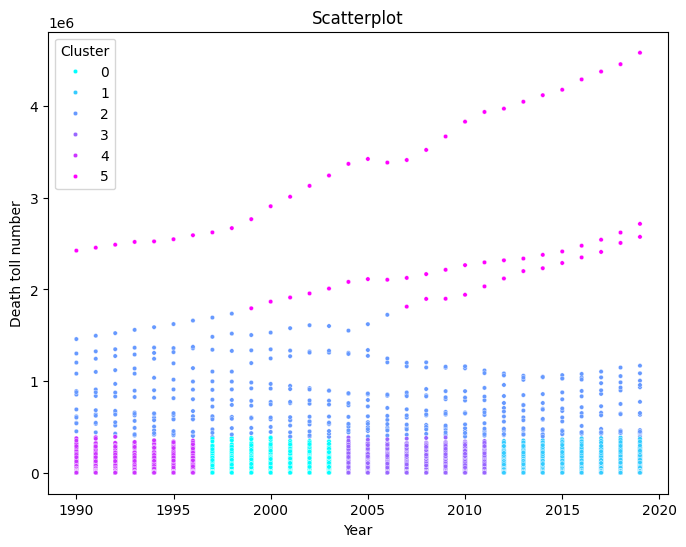

In [136]:
# Create scatter plot without text labels
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=df_filter,
    x='Year',
    y='Death Numbers',
    hue='Cluster',
    palette='cool',
    s=10  # size of points
)

plt.title('Scatterplot')
plt.xlabel('Year')
plt.ylabel('Death toll number')
plt.show()


In [137]:
print(df_filter.columns)
print(df_filter['Death Numbers'].head(235))

print("Data types before transformation:")
print(df_filter.dtypes)

# Check for non-numeric values in the columns that should be numeric
print("\nFirst few rows of df_filter555:")
print(df_filter.head())


Index(['Causes name', 'Causes Full Description', 'Death Numbers', 'Entity',
       'Code', 'Year', 'Cluster'],
      dtype='object')
0       2933.0
1      15925.0
2        481.0
3        393.0
4       2127.0
        ...   
230        6.0
231     1821.0
232    18876.0
233      463.0
234      284.0
Name: Death Numbers, Length: 235, dtype: float64
Data types before transformation:
Causes name                 object
Causes Full Description     object
Death Numbers              float64
Entity                      object
Code                        object
Year                         int64
Cluster                      int32
dtype: object

First few rows of df_filter555:
                      Causes name  \
0                      Meningitis   
1                       Neoplasms   
2  Fire, heat, and hot substances   
3                         Malaria   
4                        Drowning   

                             Causes Full Description  Death Numbers  \
0  Deaths - Meningitis - Sex: Bot

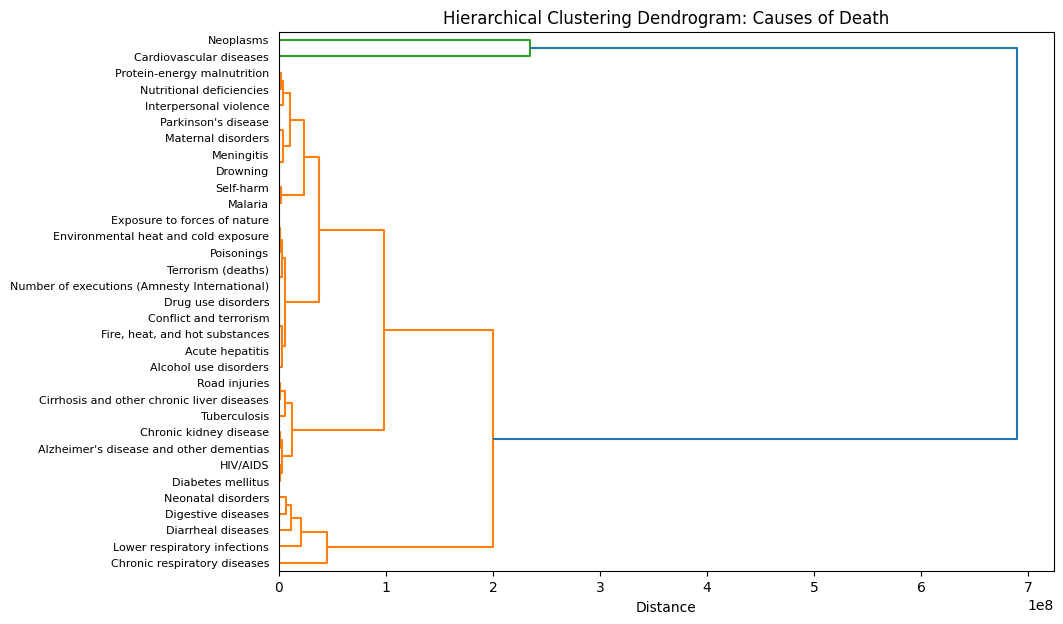

In [138]:

# Importera nödvändiga bibliotek import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
# Ladda Iris-datasetet


cause_data = df.groupby('Causes name')['Death Numbers'].sum().reset_index()

X = cause_data[['Death Numbers']].values
linkage_matrix = sch.linkage(X, method='ward')

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram: Causes of Death")
dendrogram = sch.dendrogram(linkage_matrix, labels=cause_data['Causes name'].values, orientation='right')
plt.xlabel("Causes of Death")
plt.xlabel("Distance")
plt.show()

In [139]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Select the columns you want to work with (only 'Death Numbers' in this case)
df_selected1 = df_filter[df_filter["Causes name"] == "Neonatal disorders"]["Death Numbers"]
df_selected2 = df_filter[df_filter["Causes name"] == "Digestive diseases"]["Death Numbers"]
df_selected3 = df_filter[df_filter["Causes name"] == "Diarrheal diseases"]["Death Numbers"]
df_selected4 = df_filter[df_filter["Causes name"] == "Lower respiratory infections"]["Death Numbers"]

# 2. Combine the two Series into a DataFrame
df_combined = pd.DataFrame({
    'Neonatal disorders': df_selected1.values,
    'Digestive diseases ': df_selected2.values,
    'Diarrheal diseases' :df_selected3.values,
    'Lower respiratory infections' :df_selected4.values
})

# 3. Normalize your data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_combined)

# 4. Convert the scaled data back to a DataFrame with correct column names
df_scaled = pd.DataFrame(df_scaled, columns=df_combined.columns)

# 5. Check the scaled values of 'Death Numbers'
print(df_scaled.head(6531))

      Neonatal disorders  Digestive diseases   Diarrheal diseases  \
0               0.028015             0.013891            0.008325   
1               0.027900             0.013783            0.007392   
2               0.027759             0.013676            0.006574   
3               0.028086             0.013701            0.005728   
4               0.028211             0.013762            0.005367   
...                  ...                  ...                 ...   
6025            0.010880             0.009038            0.004557   
6026            0.010630             0.009172            0.004468   
6027            0.010438             0.009339            0.004420   
6028            0.010199             0.009415            0.004239   
6029            0.010095             0.009544            0.004140   

      Lower respiratory infections  
0                         0.040051  
1                         0.037342  
2                         0.035229  
3                      

In [140]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neonatal disorders            6030 non-null   float64
 1   Digestive diseases            6030 non-null   float64
 2   Diarrheal diseases            6030 non-null   float64
 3   Lower respiratory infections  6030 non-null   float64
dtypes: float64(4)
memory usage: 188.6 KB


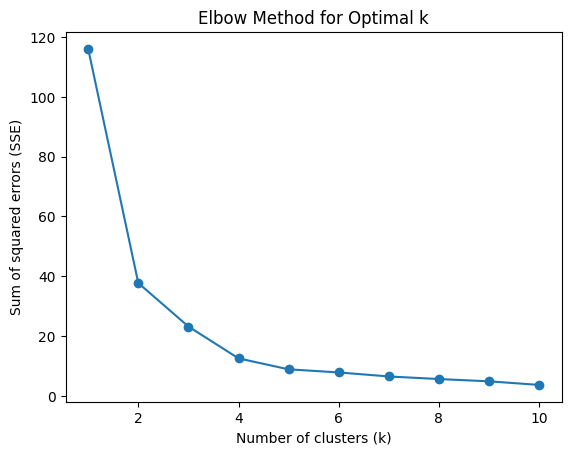

In [141]:
# 5. Elbow method to find the optimal number of clusters
sse = []  # Sum of squared distances to closest cluster center for each k

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances

# 6. Plot the elbow method results
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

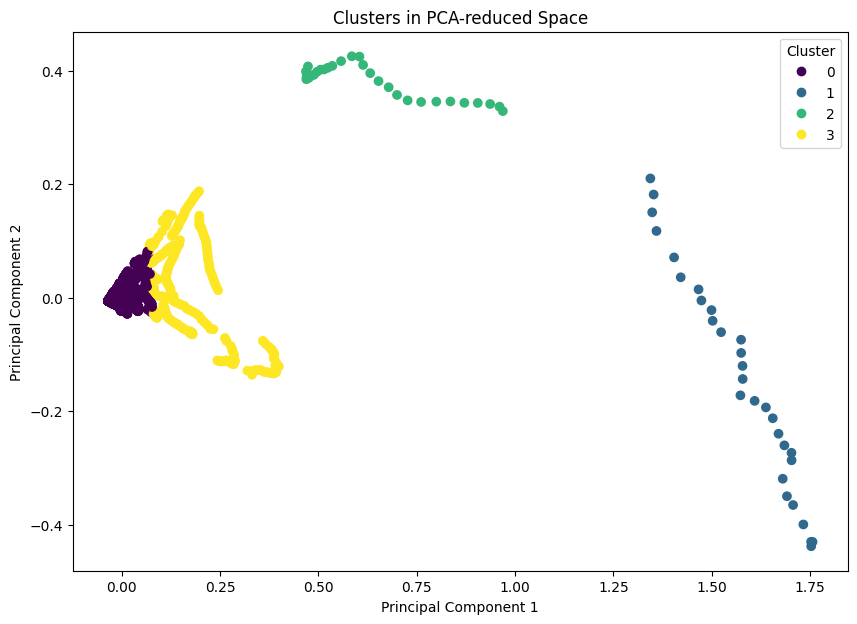

In [146]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca_df['Principal Component 1'], 
                      df_pca_df['Principal Component 2'], 
                      c=df_pca_df['Cluster'], cmap='viridis', marker='o')

# Add axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in PCA-reduced Space')

# Create a legend based on the scatter plot's elements
handles, labels = scatter.legend_elements(prop="colors")
unique_clusters = list(map(str, range(4)))  # Assuming 4 clusters
plt.legend(handles, unique_clusters, title="Cluster")

# Show the plot
plt.show()


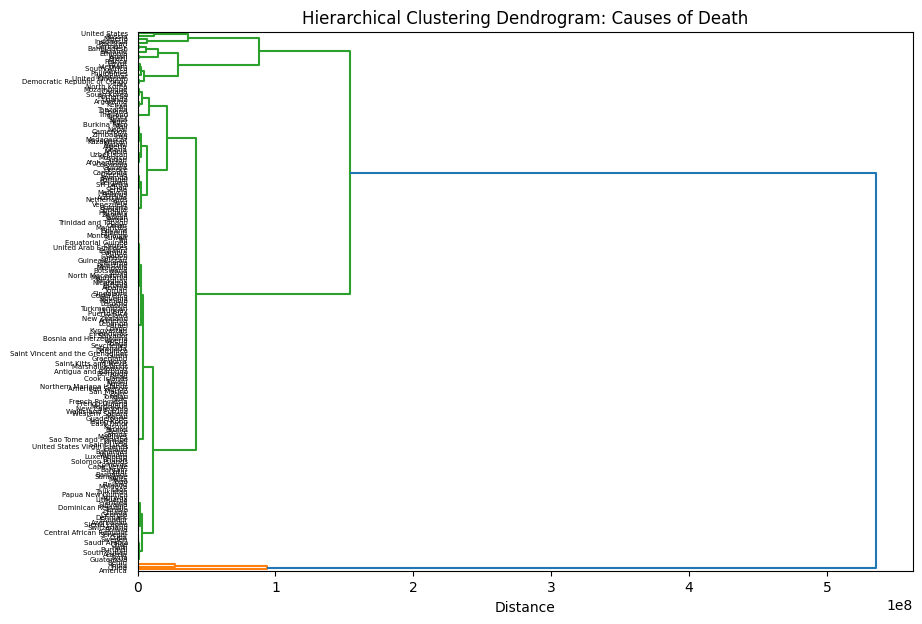

In [143]:

# Importera nödvändiga bibliotek import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
# Ladda Iris-datasetet


cause_data = df.groupby('Entity')['Death Numbers'].sum().reset_index()

X = cause_data[['Death Numbers']].values
linkage_matrix = sch.linkage(X, method='ward')

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram: Causes of Death")
dendrogram = sch.dendrogram(linkage_matrix, labels=cause_data['Entity'].values, orientation='right')
plt.xlabel("Causes of Death")
plt.xlabel("Distance")
plt.show()

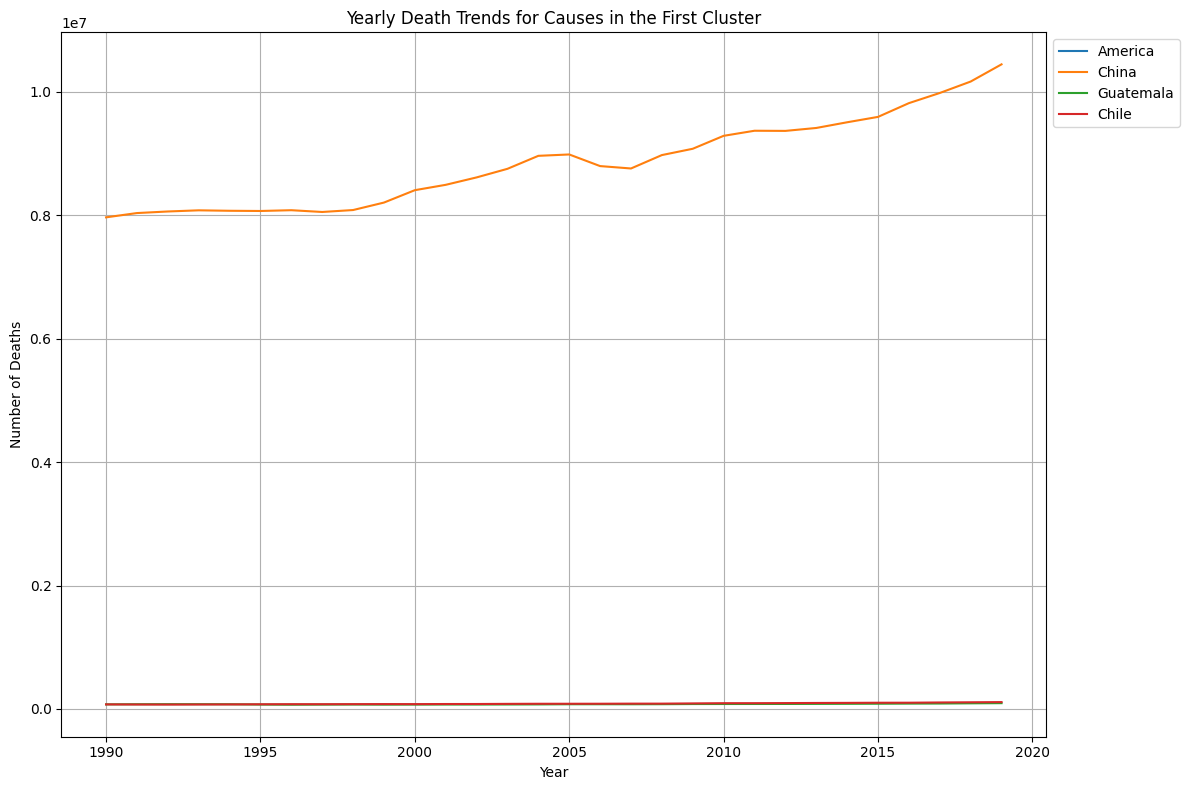

In [144]:
# Filter the data for the first cluster causes of death
causes_of_interest = ['America', 'China', 'Guatemala', 'Chile']

# Filter data for the causes in this group
filtered_data = df_filter[df_filter['Entity'].isin(causes_of_interest)]

# Aggregate death numbers by 'Entity' and 'Year'
trends_data = filtered_data.groupby(['Entity', 'Year'])['Death Numbers'].sum().reset_index()

# Plot the trends for these causes over time
plt.figure(figsize=(12, 8))

# Plotting trends for each cause of death
for cause in causes_of_interest:
    subset = trends_data[trends_data['Entity'] == cause]
    plt.plot(subset['Year'], subset['Death Numbers'], label=cause)

# Customizing the plot
plt.title('Yearly Death Trends for Causes in the First Cluster')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

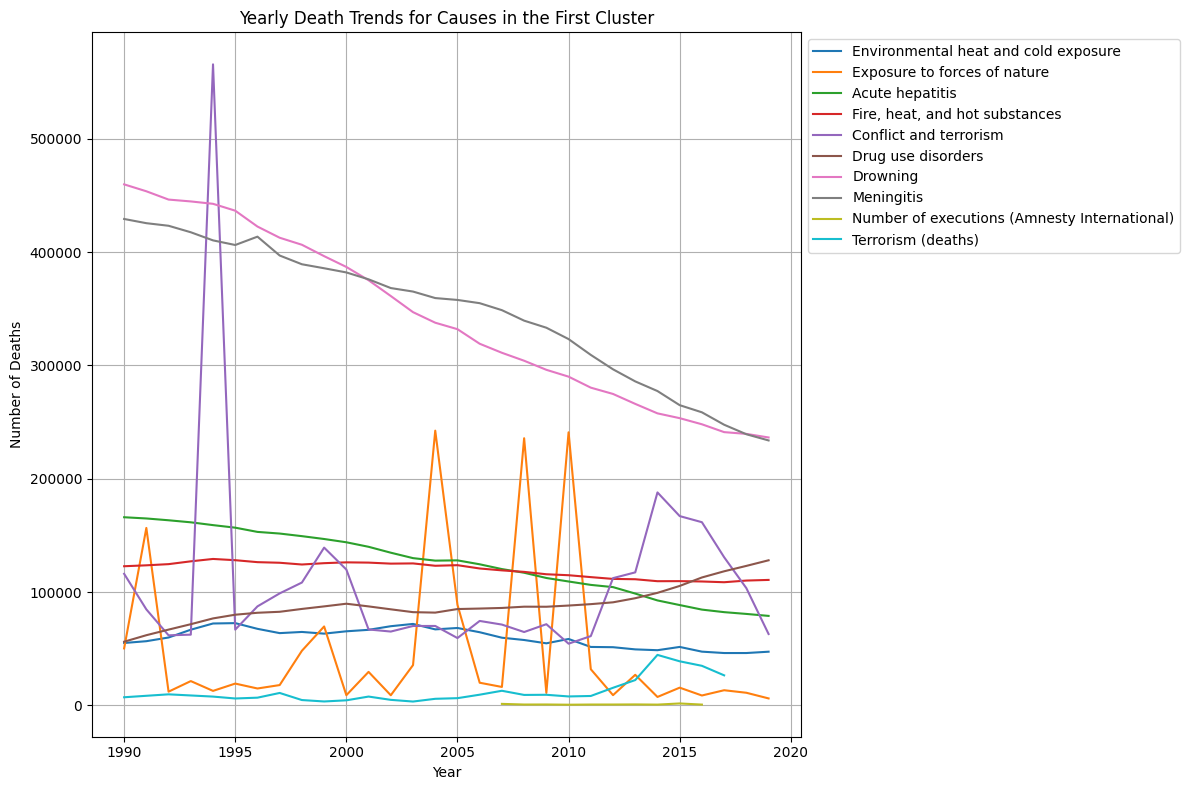

In [148]:
# Filter the data for the first cluster causes of death
causes_of_interest = ['Environmental heat and cold exposure',
                      'Exposure to forces of nature', 'Acute hepatitis',
                      'Fire, heat, and hot substances', 'Conflict and terrorism',
                      'Drug use disorders', 'Drowning', 'Meningitis',
                      'Number of executions (Amnesty International)', 'Terrorism (deaths)']

# Filter data for the causes in this group
filtered_data = df_filter[df_filter['Causes name'].isin(causes_of_interest)]

# Aggregate death numbers by 'Causes name' and 'Year'
trends_data = filtered_data.groupby(['Causes name', 'Year'])['Death Numbers'].sum().reset_index()

# Plot the trends for these causes over time
plt.figure(figsize=(12, 8))

# Plotting trends for each cause of death
for cause in causes_of_interest:
    subset = trends_data[trends_data['Causes name'] == cause]
    plt.plot(subset['Year'], subset['Death Numbers'], label=cause)

# Customizing the plot
plt.title('Yearly Death Trends for Causes in the First Cluster')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
